In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

In [2]:
from sklearn import preprocessing, metrics
import utils
import scipy.io
import numpy as np
from linear_classifier import LinearSVM_twoclass

from sklearn.model_selection import train_test_split
import pandas as pd

# load the SPAM email training dataset

X,y = utils.load_mat('data/spamTrain.mat')
yy = np.ones(y.shape)
yy[y==0] = -1

# load the SPAM email test dataset

test_data = scipy.io.loadmat('data/spamTest.mat')
X_test = test_data['Xtest']
y_test = test_data['ytest'].flatten()
##################################################################################
#  YOUR CODE HERE for training the best performing SVM for the data above.       #
#  what should C be? What should num_iters be? Should X be scaled?               #
#  should X be kernelized? What should the learning rate be? What should the     #
#  number of iterations be?                                                      #
##################################################################################

# Answer:
# 1. C can be decided with a validation set
# 2. num_iters can be decided by plotting the loss history. See below.
# 3. X shouldn't be scaled. However, we should scale the calculated kernel matrix.
# 4. X can be kernelied by a linear kernel X'*X. 
# 5. the learning rates can be decided by cross validation.

X_train, X_val, yy_train, yy_val = train_test_split(X, yy)

K = X_train.dot(X_train.T)
K = np.vstack((np.ones(K.shape[0],),K.T)).T
scaler = preprocessing.StandardScaler().fit(K)
scaleK = scaler.transform(K)

Kval = X_val.dot(X_train.T)
Kval = np.vstack((np.ones(Kval.shape[0],),Kval.T)).T
scaler_val = preprocessing.StandardScaler().fit(Kval)
scaleKval = scaler_val.transform(Kval)

## Decide the number of iterations

To determine the number of iterations, we plot the loss history as a function of steps with different learning rate and regularization factors 

In [3]:
# # Compute Kernel: Using Linear Kernels - X1'*X2
C = [1e-3,1e-2,1e-1]
learning_rate = [1e-6,3e-6,1e-5,3e-5,1e-4,3e-4,1e-3,3e-3]
num_iter = 10000
hyper_para = [(cval, lr) for cval in C for lr in learning_rate]
loss_hist = {}
for C,lr in hyper_para: 
        print 'Training - ',(C,lr)
        svm = LinearSVM_twoclass()
        svm.theta = np.zeros((K.shape[1],))
        loss_hist[(C, lr)] = svm.train(K,yy_train,learning_rate=lr,reg=C,num_iters=num_iter,verbose=False,batch_size=K.shape[0])

Training -  (0.001, 1e-06)
Training -  (0.001, 3e-06)
Training -  (0.001, 1e-05)
Training -  (0.001, 3e-05)
Training -  (0.001, 0.0001)
Training -  (0.001, 0.0003)
Training -  (0.001, 0.001)
Training -  (0.001, 0.003)
Training -  (0.01, 1e-06)
Training -  (0.01, 3e-06)
Training -  (0.01, 1e-05)
Training -  (0.01, 3e-05)
Training -  (0.01, 0.0001)
Training -  (0.01, 0.0003)
Training -  (0.01, 0.001)
Training -  (0.01, 0.003)
Training -  (0.1, 1e-06)
Training -  (0.1, 3e-06)
Training -  (0.1, 1e-05)
Training -  (0.1, 3e-05)
Training -  (0.1, 0.0001)
Training -  (0.1, 0.0003)
Training -  (0.1, 0.001)
Training -  (0.1, 0.003)


In [4]:
Loss = pd.DataFrame(loss_hist)

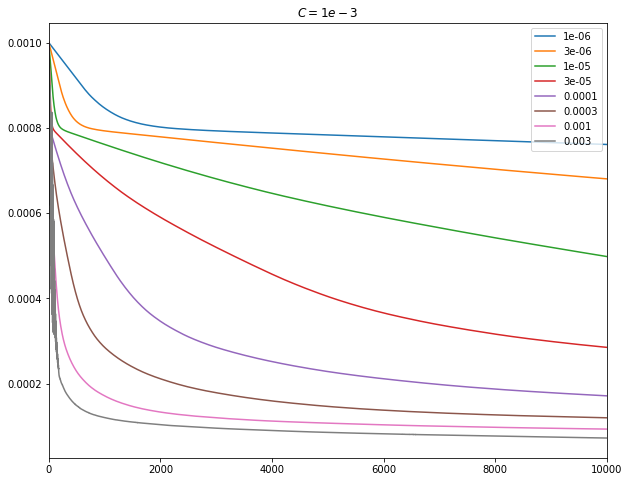

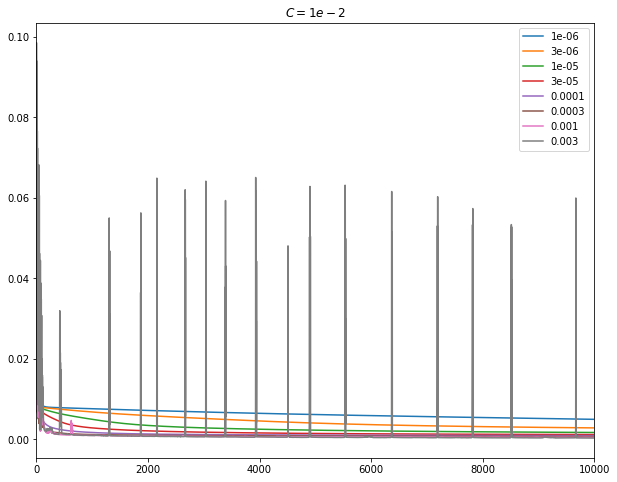

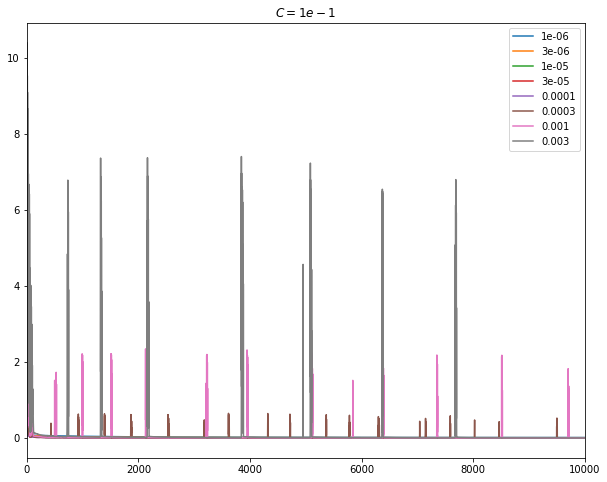

In [5]:
Loss[(0.001,)].plot()
plt.title('$C=1e-3$')
plt.legend()
Loss[(0.01,)].plot()
plt.title('$C=1e-2$')
plt.legend()
Loss[(0.1,)].plot()
plt.title('$C=1e-1$')
plt.legend()

By plotting the loss history, we can see that to obtain a converged results, the regulariation factor $C$ should be smaller than 1e-2, and the learning rate should be 
less than 1e-3, otherwise it can easily diverged. The total steps should be 2000 for most cases. Here, we use 4000 for safety.

In [6]:
# # Compute Kernel: Using Linear Kernels - X1'*X2
C = [1e-1,3e-1,1e-5,3e-5,1e-4,3e-4,1e-3,3e-3,1e-2]
learning_rate = [3e-3,1e-6,3e-6,1e-5,3e-5,1e-4,3e-4,1e-3]
num_iter = 4000
hyper_para = [(cval, lr) for cval in C for lr in learning_rate]

best_accuracy = -1
best_para = None
for cval, lr in hyper_para:
    svm = LinearSVM_twoclass()
    svm.theta = np.zeros((K.shape[1],))
    svm.train(K,yy_train,learning_rate=lr,reg=cval,num_iters=num_iter,verbose=False)
    cur_acc = np.sum(svm.predict(Kval) == yy_val)*1./yy_val.shape[0]
    if cur_acc > best_accuracy:
        best_accuracy = cur_acc
        best_para = (cval, lr)
        best_svm = svm
    print('Cur para:', (cval, lr), 'Cur_acc:', cur_acc, 'Best_acc:', best_accuracy, best_para)
    

('Cur para:', (0.1, 0.003), 'Cur_acc:', 0.963, 'Best_acc:', 0.963, (0.1, 0.003))
('Cur para:', (0.1, 1e-06), 'Cur_acc:', 0.934, 'Best_acc:', 0.963, (0.1, 0.003))
('Cur para:', (0.1, 3e-06), 'Cur_acc:', 0.96, 'Best_acc:', 0.963, (0.1, 0.003))
('Cur para:', (0.1, 1e-05), 'Cur_acc:', 0.968, 'Best_acc:', 0.968, (0.1, 1e-05))
('Cur para:', (0.1, 3e-05), 'Cur_acc:', 0.975, 'Best_acc:', 0.975, (0.1, 3e-05))
('Cur para:', (0.1, 0.0001), 'Cur_acc:', 0.979, 'Best_acc:', 0.979, (0.1, 0.0001))
('Cur para:', (0.1, 0.0003), 'Cur_acc:', 0.981, 'Best_acc:', 0.981, (0.1, 0.0003))
('Cur para:', (0.1, 0.001), 'Cur_acc:', 0.98, 'Best_acc:', 0.981, (0.1, 0.0003))
('Cur para:', (0.3, 0.003), 'Cur_acc:', 0.981, 'Best_acc:', 0.981, (0.1, 0.0003))
('Cur para:', (0.3, 1e-06), 'Cur_acc:', 0.959, 'Best_acc:', 0.981, (0.1, 0.0003))
('Cur para:', (0.3, 3e-06), 'Cur_acc:', 0.967, 'Best_acc:', 0.981, (0.1, 0.0003))
('Cur para:', (0.3, 1e-05), 'Cur_acc:', 0.973, 'Best_acc:', 0.981, (0.1, 0.0003))
('Cur para:', (0.3, 3

In [7]:
##################################################################################
# YOUR CODE HERE for testing your best model's performance                       #
# what is the accuracy of your best model on the test set? On the training set?  #
##################################################################################
Ktest = X_test.dot(X_train.T)
Ktest = np.vstack((np.ones(Ktest.shape[0],),Ktest.T)).T
scaler = preprocessing.StandardScaler().fit(Ktest)
scaleK = scaler.transform(Ktest)
test_acc = np.sum((best_svm.predict(Ktest)>0)==y_test)*1./y_test.shape[0]
print('Best test acc:', test_acc)
##################################################################################
# ANALYSIS OF MODEL: Print the top 15 words that are predictive of spam and for  #
# ham. Hint: use the coefficient values of the learned model                     #
##################################################################################
words, inv_words = utils.get_vocab_dict()
words_weight = np.sum(X_train*best_svm.theta[1:,np.newaxis],axis=0)
spam_word = [words[i+1] for i in np.argsort(words_weight)[-15:]]
print(spam_word)
##################################################################################
#                    END OF YOUR CODE                                            #
##################################################################################

('Best test acc:', 0.977)
['offer', 'nbsp', 'receiv', 'inform', 'will', 'monei', 'dollarnumb', 'here', 'we', 'email', 'pleas', 'your', 'remov', 'click', 'our']


In [8]:
import pandas as pd
import numpy as np
pd.Series(pd.datetime(2018, 06, 12)).dt.week - pd.Series(pd.datetime(2018, 03, 12)).dt.week


0    13
dtype: int64

In [9]:
50000./4000

12.5